# Exploratory Data Analysis of the "MRI and Alzheimers" Dataset

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [242]:
cross_data = pd.read_csv('oasis_cross-sectional.csv')
long_data = pd.read_csv('oasis_longitudinal.csv')

## Description of the Datasets

### oasis_cross-sectional.csv: 
    A cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD). Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a subsequent visit within 90 days of their initial session.

### oasis_longitudinal.csv:
    A longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

### Source:
[MRI and Alzheimers Dataset on Kaggle](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers/data). Nth scan for patient A)
)it order

Source: [Link](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers/data)

In [244]:
# Glossary 
# SES: Socioeconomic Status (1: Lower class, 2: Lower-middle class, 3: Middle class, 4: Middle-upper class, 5: Upper class)
# MMSE: Mini-Mental State Examination (a measure of cognitive impairment)
# CDR: Clinical Dementia Rating
# eTIV: Estimated Total Intracranial Volume
# nWBV: Normalized volume (Percentage which represents the percentage of the total white and gray matter voxels within the eTIV)
# (MR) Delay: Number of days between two medical visits
# Educ: Education level (1: Did not finish high school, 2: High school, 3: Some college, 4: College grad, 5: Beyond college)
# EDUC: Years of education
# ASF: Atlas Scaling Factor (Used to align or normalize anatomical data, in this case to compare MRI brain images)
# Visit: Visit number for each scan, respective to each patient (i.e. Nth scan for patient A)

In [245]:
long_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [246]:
long_data = long_data.drop_duplicates()
long_data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [247]:
long_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [248]:
# Converting to Categorical dtypes to minimize memory usage
long_data['Group'] = pd.Categorical(long_data['Group'])
long_data['M/F'] = pd.Categorical(long_data['M/F'])
long_data['Hand'] = pd.Categorical(long_data['Hand'])
long_data['SES'] = pd.Categorical(long_data['SES'], ordered=True)

In [249]:
long_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Subject ID  373 non-null    object  
 1   MRI ID      373 non-null    object  
 2   Group       373 non-null    category
 3   Visit       373 non-null    int64   
 4   MR Delay    373 non-null    int64   
 5   M/F         373 non-null    category
 6   Hand        373 non-null    category
 7   Age         373 non-null    int64   
 8   EDUC        373 non-null    int64   
 9   SES         354 non-null    category
 10  MMSE        371 non-null    float64 
 11  CDR         373 non-null    float64 
 12  eTIV        373 non-null    int64   
 13  nWBV        373 non-null    float64 
 14  ASF         373 non-null    float64 
dtypes: category(4), float64(4), int64(5), object(2)
memory usage: 34.2+ KB


In [250]:
long_data.nunique()

Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
M/F             2
Hand            1
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          286
nWBV          136
ASF           265
dtype: int64

In [251]:
long_data.sort_values('CDR', ascending=False).head(20)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,25.0,2.0,1710,0.760,1.026
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,2.0,1401,0.700,1.253
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,2.0,1503,0.660,1.168
186,OAS2_0088,OAS2_0088_MR2,Demented,2,751,M,R,80,12,4.0,20.0,1.0,1494,0.661,1.175
97,OAS2_0048,OAS2_0048_MR1,Demented,1,0,M,R,66,16,1.0,19.0,1.0,1695,0.711,1.036
106,OAS2_0050,OAS2_0050_MR2,Demented,2,538,M,R,72,12,4.0,17.0,1.0,1483,0.695,1.184
323,OAS2_0160,OAS2_0160_MR2,Demented,2,552,M,R,78,12,NaN,29.0,1.0,1569,0.704,1.119
101,OAS2_0048,OAS2_0048_MR5,Demented,5,1233,M,R,69,16,1.0,4.0,1.0,1701,0.676,1.032
100,OAS2_0048,OAS2_0048_MR4,Demented,4,970,M,R,68,16,1.0,7.0,1.0,1714,0.682,1.024
99,OAS2_0048,OAS2_0048_MR3,Demented,3,647,M,R,68,16,1.0,19.0,1.0,1712,0.691,1.025


In [252]:
# # IQR to identify outliers
# Q1 = long_data[''].quantile(0.25)
# Q3 = long_data[''].quantile(0.75)
# IQR = Q3 - Q1
# outliers = long_data[(long_data[''] < (Q1 - 1.5 * IQR)) | (long_data[''] > (Q3 + 1.5 * IQR))]

In [253]:
# NOTE: LabelEncoder changes the ordinal enumeration of SES column values
# A copy of long_data without null values has categorical columns of interest
# enumerated to identify correlations via heatmap

# Create a copy of long_data without null values
long_data_copy = long_data.copy().dropna(inplace=False)

# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Group' column, and assign it to 'group_int'
long_data_copy['group_int'] = le.fit_transform(long_data_copy['Group'])

# Fit and transform the 'M/F' column, and assign it to 'mf_int'
long_data_copy['mf_int'] = le.fit_transform(long_data_copy['M/F'])

# Fit and transform the 'SES' column, and assign it to 'SES_int'
long_data_copy['SES_int'] = le.fit_transform(long_data_copy['SES'])
 
# Printing Dataframe
long_data_copy

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,group_int,mf_int,SES_int
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,2,1,1
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,2,1,1
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444,2,0,2
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462,2,0,2
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037,1,1,0
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040,1,1,0
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,2,0,1
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,2,0,1


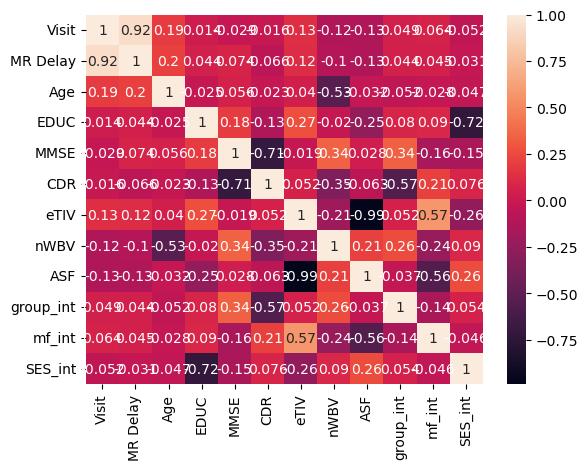

In [254]:
# Create a view of potential correlations to examine
long_corr_data = long_data_copy.select_dtypes(include=['int32', 'int64', 'float64']) 
corr_matrix = long_corr_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

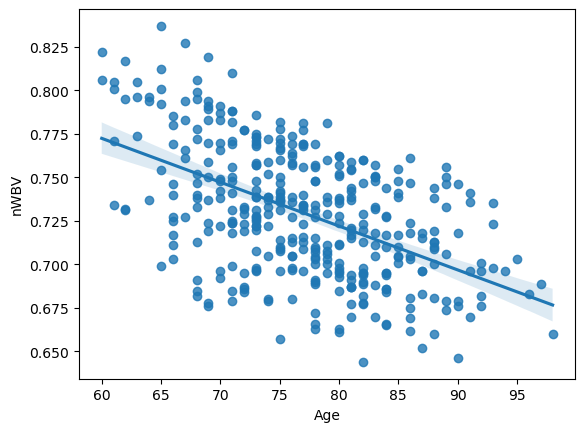

In [255]:
# Plot a downward trend between patient age and brain volume
sns.regplot(data=long_data, x='Age', y='nWBV')
plt.show()

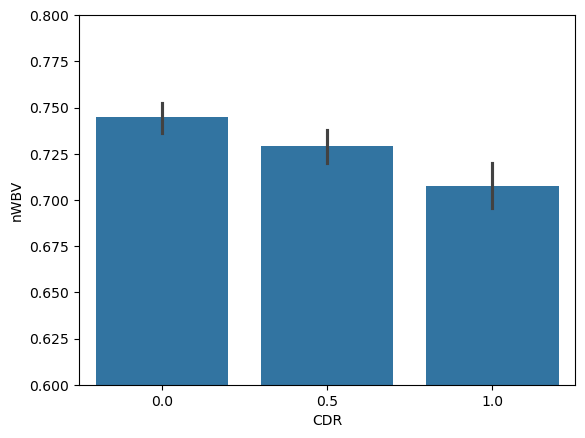

In [256]:
# View the trend in brain volume among first-time patients
# with varying degrees of Clinical Dementia Rating
first_visits = long_data[long_data['Visit'] == 1] 
sns.barplot(data=first_visits, x='CDR', y='nWBV')
plt.ylim([0.6,0.8])
plt.show()

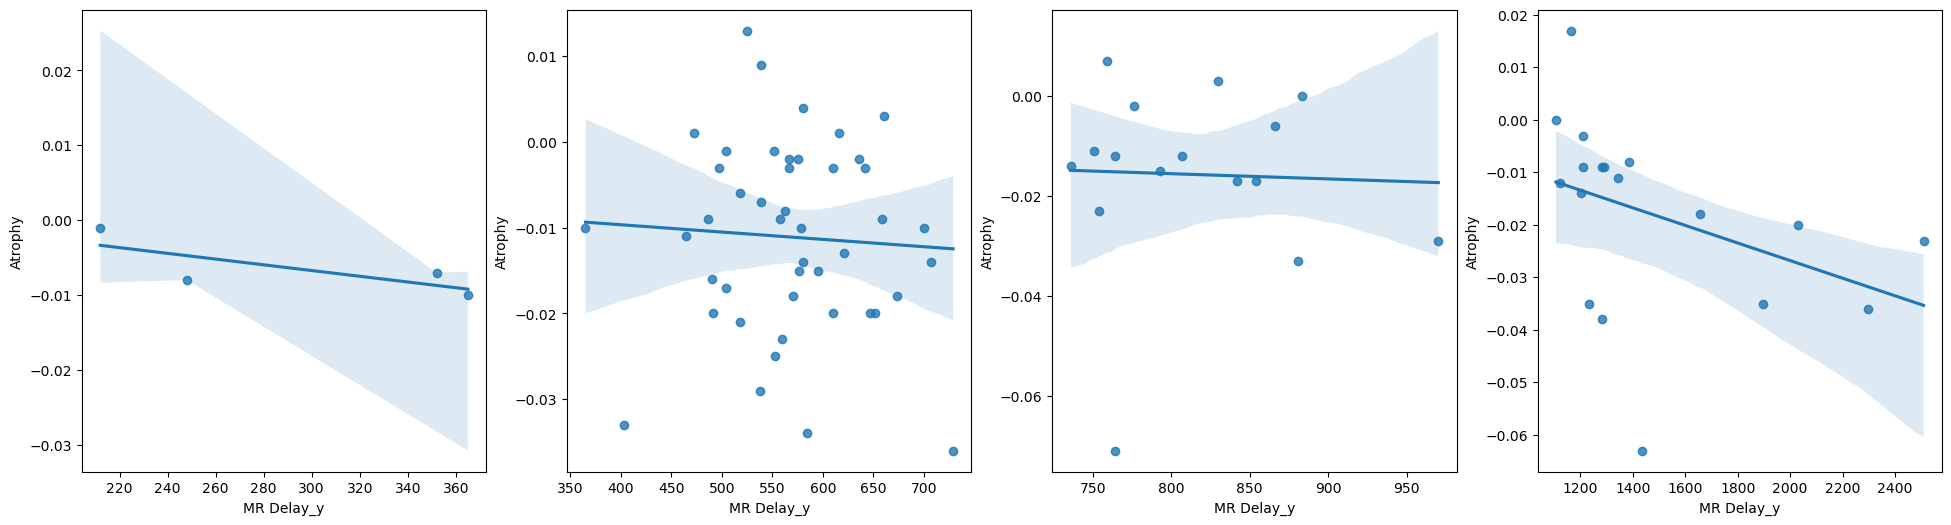

In [257]:
# Only examining patients with dementia
demented_data = long_data[long_data['Group'] == 'Demented']

# Merge table with self to compare features across visits
demented_condensed = demented_data.merge(demented_data, on='Subject ID')[['Subject ID', 'Visit_x', 'Visit_y', 'nWBV_x', 'nWBV_y', 'MR Delay_y']]
demented_condensed = demented_condensed[(demented_condensed['Visit_x'] < demented_condensed['Visit_y']) & (demented_condensed['Visit_x'] == 1)]
demented_condensed

# Atrophy within the first year 
one_year = demented_condensed[demented_condensed['MR Delay_y'].between(0, 365)].copy()
one_year['Atrophy'] = one_year['nWBV_y'] - one_year['nWBV_x'] 

# Atrophy within the first two years
two_years = demented_condensed[demented_condensed['MR Delay_y'].between(365, 2*365)].copy()
two_years['Atrophy'] = two_years['nWBV_y'] - two_years['nWBV_x']

# Atrophy within the first three years
three_years = demented_condensed[demented_condensed['MR Delay_y'].between(2*365, 3*365)].copy()
three_years['Atrophy'] = three_years['nWBV_y'] - three_years['nWBV_x']

# Atrophy beyond three years
four_plus_years = demented_condensed[demented_condensed['MR Delay_y'] >= (365*3)].copy()
four_plus_years['Atrophy'] = four_plus_years['nWBV_y'] - four_plus_years['nWBV_x']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))

# Plot each DataFrame on a separate subplot
sns.regplot(data=one_year, x='MR Delay_y', y='Atrophy', ax=axes[0])
sns.regplot(data=two_years, x='MR Delay_y', y='Atrophy', ax=axes[1])
sns.regplot(data=three_years, x='MR Delay_y', y='Atrophy', ax=axes[2])
sns.regplot(data=four_plus_years, x='MR Delay_y', y='Atrophy', ax=axes[3])

# Show plot
plt.show()

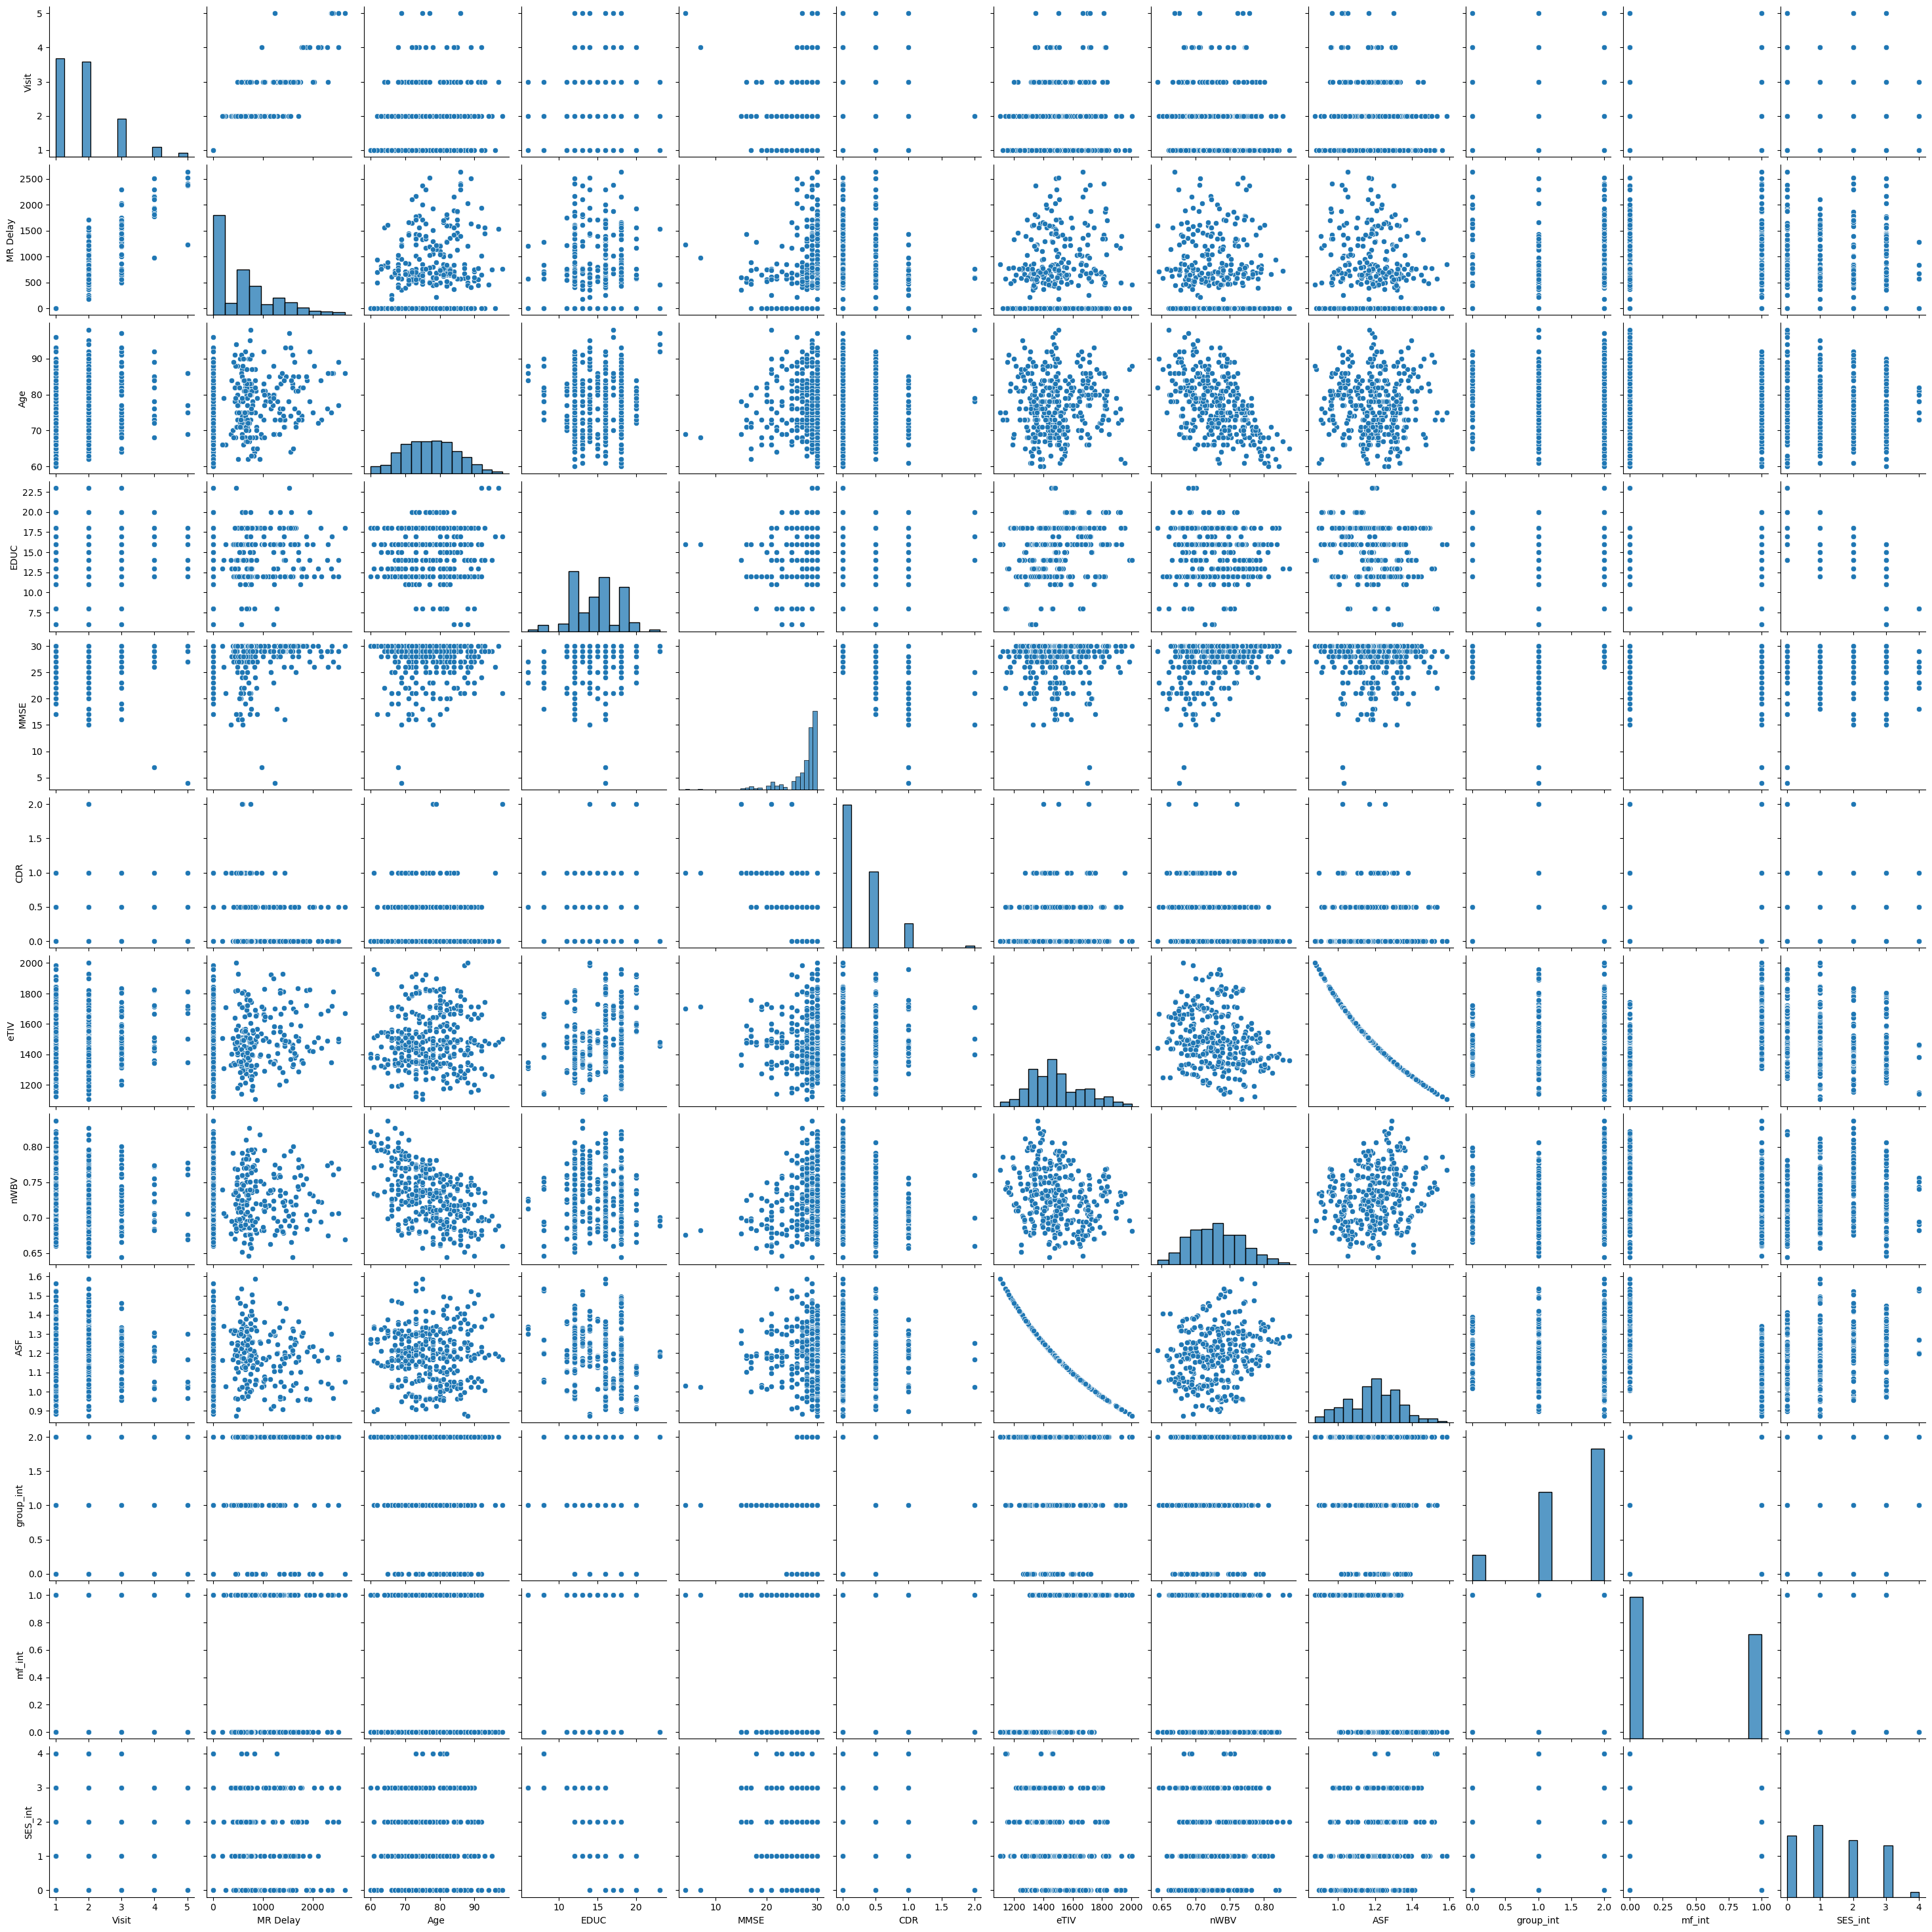

In [258]:
# Pairwise graph to quickly view possible correlations 
sns.pairplot(long_data_copy)
plt.show()

In [259]:
# Statistical summary
long_data_copy.describe()

,Visit,MR Delay,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF,group_int,mf_int,SES_int
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,1.884181,601.353107,77.033898,14.703390,27.409605,0.271186,1489.991525,0.729879,1.193780,1.432203,0.423729,1.460452
std,0.925330,640.596081,7.811808,2.895662,3.712626,0.370537,175.768462,0.037842,0.136821,0.675078,0.494848,1.134005
min,1.000000,0.000000,60.000000,6.000000,4.000000,0.000000,1106.000000,0.644000,0.876000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,71.000000,12.000000,27.000000,0.000000,1358.250000,0.699000,1.100250,1.000000,0.000000,1.000000
50%,2.000000,559.500000,77.000000,15.000000,29.000000,0.000000,1470.500000,0.729000,1.193500,2.000000,0.000000,1.000000
75%,2.000000,882.500000,82.000000,16.750000,30.000000,0.500000,1595.250000,0.757000,1.292500,2.000000,1.000000,2.000000
max,5.000000,2639.000000,98.000000,23.000000,30.000000,2.000000,2004.000000,0.837000,1.587000,2.000000,1.000000,4.000000
